In [313]:
import pandas as pd
import numpy as np
import itertools
from itertools import chain, combinations
import statsmodels.formula.api as smf
import scipy.stats as scipystats
import statsmodels.api as sm
import statsmodels.stats.stattools as stools
import statsmodels.stats as stats 
from statsmodels.graphics.regressionplots import *
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.cross_validation import train_test_split
import math
import time
from sklearn.linear_model import LinearRegression

%matplotlib inline 
plt.rcParams['figure.figsize'] = (16, 12)

restaurants = pd.read_pickle('src/Alans_df.pkl')   

In [314]:
restaurants.drop(['city','id'], axis=1, inplace=True)

restaurants.describe()
def clean_names(df):
    temp_liz = [name.replace(".","_") for name in df.columns]
    df.columns = temp_liz
    return df

In [315]:
clean_names(restaurants)

,p1,p2,p3,p4,p5,p6,p7,p8,p10,p11,...,cat_10,cat_4_0,cat_5_0,cat_6_0,cat_7_5,cat_2,cat_3,cat_4,cat_5,cat_6
0,4,5.0,4.0,4.0,2,2,5,4,5,3,...,0,0,1,0,0,0,0,0,1,0
1,4,5.0,4.0,4.0,1,2,5,5,5,1,...,0,0,1,0,0,0,0,0,0,0
2,2,4.0,2.0,5.0,2,3,5,5,5,2,...,0,0,1,0,0,0,0,0,0,0
3,6,4.5,6.0,6.0,4,4,10,8,10,8,...,1,0,0,0,1,0,0,0,0,1
4,3,4.0,3.0,4.0,2,2,5,5,5,2,...,0,0,1,0,0,1,0,0,0,0
5,6,6.0,4.5,7.5,8,10,10,8,8,10,...,0,0,0,1,0,0,0,0,0,0
6,2,3.0,4.0,4.0,1,5,5,5,5,2,...,0,0,1,0,0,1,0,0,0,0
7,4,5.0,4.0,5.0,2,3,5,4,4,4,...,0,1,0,0,0,0,0,0,0,0
8,1,1.0,4.0,4.0,1,2,1,5,5,1,...,0,0,1,0,0,0,1,0,0,0
9,6,4.5,6.0,7.5,6,4,10,10,10,2,...,1,0,0,0,1,0,0,0,0,0


In [311]:
# restaurants.info()

In [316]:
y = restaurants.pop('revenue')
X = restaurants

In [317]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
np.mean(y_train)

4530689.788990825

In [321]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)


In [322]:
standardized = pd.concat([X, y], axis=1)


In [323]:
lm = smf.ols(formula = "revenue ~ p1 + p2 + p3 + p4+ p5 + p6 + p7 + p8 + p10 + p11 + p12 + p14 + p15 + p16 + p17 + p18 + p19 + p20 + p21 + p22 + p23 + p24 + p25 + p26 + p27 + p28 + p29 + p30 + p31 + p32 + p34 + p35 + p36 + p37 + date_delta + cat_fc + cat_il + cat_other + cat_5 + cat_8 + cat_10 + cat_4_0 + cat_5_0 + cat_6_0 + cat_7_5 + cat_2 + cat_3 + cat_4 + cat_5 + cat_6", data = standardized).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     1.148
Date:                Fri, 29 Jun 2018   Prob (F-statistic):              0.284
Time:                        00:41:35   Log-Likelihood:                -2182.9
No. Observations:                 137   AIC:                             4464.
Df Residuals:                      88   BIC:                             4607.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    5.12e+06   3.62e+06      1.413      0.1

/Users/alanteran/anaconda3/lib/python3.6/site-packages/numpy/linalg/linalg.py:1804: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)




Leverage v.s. Studentized Residuals


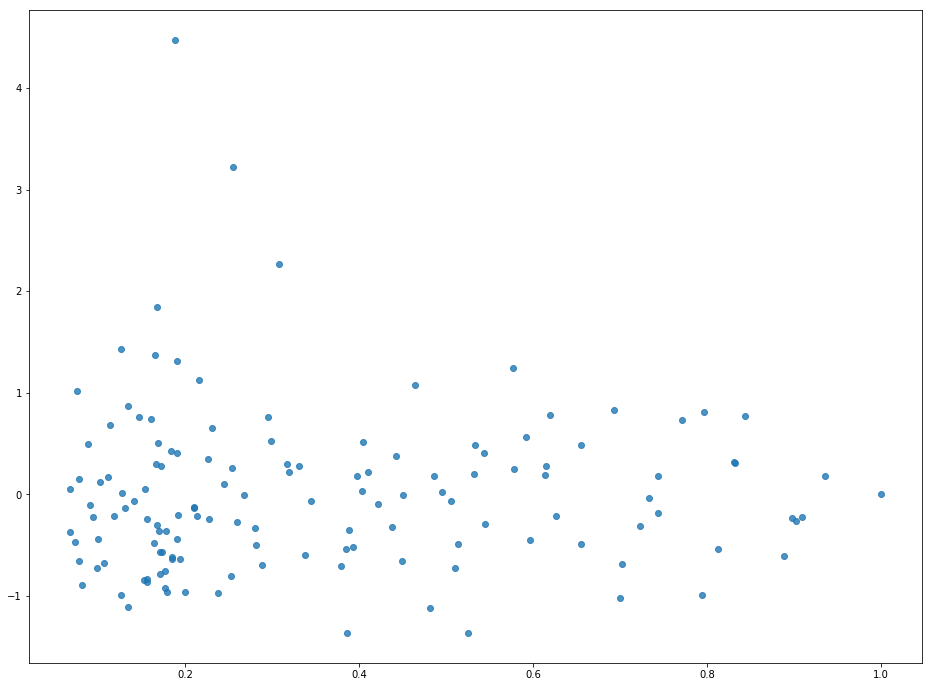

In [324]:
influence = lm.get_influence()
resid_student = influence.resid_studentized_external
(cooks, p) = influence.cooks_distance
(dffits, p) = influence.dffits
leverage = influence.hat_matrix_diag
print('\n')
print('Leverage v.s. Studentized Residuals')
sns.regplot(leverage, lm.resid_pearson, fit_reg=False)


In [325]:
pd.Series(influence.hat_matrix_diag).describe()

count    137.000000
mean       0.357664
std        0.245354
min        0.067355
25%        0.167447
50%        0.259385
75%        0.525319
max        1.000000
dtype: float64

In [326]:
restaurants1res = pd.concat([pd.Series(cooks, name = "cooks"), pd.Series(dffits, name = "dffits"), pd.Series(leverage, name = "leverage"), pd.Series(resid_student, name = "resid_student")], axis = 1)
restaurants1res = pd.concat([restaurants, restaurants1res], axis = 1)
restaurants1res.head() 

,p1,p2,p3,p4,p5,p6,p7,p8,p10,p11,...,cat_7_5,cat_2,cat_3,cat_4,cat_5,cat_6,cooks,dffits,leverage,resid_student
0,4,5.0,4.0,4.0,2,2,5,4,5,3,...,0,0,0,0,1,0,0.007660,-0.621949,0.743991,-0.364837
1,4,5.0,4.0,4.0,1,2,5,5,5,1,...,0,0,0,0,0,0,0.000521,0.162288,0.088921,0.519472
2,2,4.0,2.0,5.0,2,3,5,5,5,2,...,0,0,0,0,0,0,0.002630,-0.364852,0.281912,-0.582303
3,6,4.5,6.0,6.0,4,4,10,8,10,8,...,1,0,0,0,0,1,0.123195,-2.502005,0.902178,-0.823876
4,3,4.0,3.0,4.0,2,2,5,5,5,2,...,0,1,0,0,0,0,0.000065,-0.057098,0.345333,-0.078617


In [327]:
r = restaurants1res.resid_student
print('-'*30 + ' studentized residual ' + '-'*30)
print(r.describe())
print('\n')

r_sort = restaurants1res.sort_values(by= 'resid_student')
print('-'*30 + ' top 5 most negative residuals ' + '-'*30)
print(r_sort.head())
print('\n')

print('-'*30 + ' top 5 most positive residuals ' + '-'*30)
print(r_sort.tail())

------------------------------ studentized residual ------------------------------
count    137.000000
mean       0.004521
std        1.072399
min       -2.227778
25%       -0.701705
50%       -0.125524
75%        0.470921
max        5.814713
Name: resid_student, dtype: float64


------------------------------ top 5 most negative residuals ------------------------------
     p1   p2   p3   p4  p5  p6  p7  p8  p10  p11      ...        cat_7_5  \
64   12  7.5  6.0  6.0   2   8  10  10   10    4      ...              1   
112   4  5.0  5.0  4.0   1   5   5   5    4    2      ...              0   
10    9  6.0  6.0  6.0   4   4  10   8   10    8      ...              1   
118  12  7.5  7.5  4.5   2  10  10  10   10    4      ...              1   
117   3  5.0  4.0  5.0   3   3   5   4    5    4      ...              0   

     cat_2  cat_3  cat_4  cat_5  cat_6     cooks    dffits  leverage  \
64       0      0      1      0      0  0.359703 -4.378469  0.794357   
112      1      0      0  

In [93]:
# Residuals that should be discarded
print(restaurants[abs(r) > 2])

     p1   p2   p3   p4  p5  p6  p7  p8  p10  p11  ...    cat_10  cat_4_0  \
16    3  5.0  4.0  4.0   2   5   5   4    4    3  ...         0        1   
64   12  7.5  6.0  6.0   2   8  10  10   10    4  ...         1        0   
75    5  5.0  4.0  5.0   1   4   5   3    4    5  ...         0        1   
99    4  5.0  4.0  4.0   2   4   5   4    4    5  ...         0        1   
112   4  5.0  5.0  4.0   1   5   5   5    4    2  ...         0        1   
116   2  4.0  4.0  4.0   2   2   5   4    5    3  ...         0        0   

     cat_5_0  cat_6_0  cat_7_5  cat_2  cat_3  cat_4  cat_5  cat_6  
16         0        0        0      0      0      0      0      0  
64         0        0        1      0      0      1      0      0  
75         0        0        0      0      0      0      0      0  
99         0        0        0      1      0      0      0      0  
112        0        0        0      1      0      0      0      0  
116        1        0        0      0      0      0      0 

### Leverage points

Generally, a point with leverage greater than (2k+2)/n should be carefully examined, where k is the number of predictors and n is the number of observations. In my case this works out to (2*51+2)/137 = .7591

In [116]:
leverage = restaurants1res.leverage
print('-'*30 + ' Leverage ' + '-'*30)
print(leverage.describe())
print('\n')

leverage_sort = restaurants1res.sort_values(by= 'leverage', ascending=False)
print('-'*30 + ' top 15 highest leverage data points ' + '-'*30)
print(leverage_sort.head(15))


------------------------------ Leverage ------------------------------
count    137.000000
mean       0.357664
std        0.245354
min        0.067355
25%        0.167447
50%        0.259385
75%        0.525319
max        1.000000
Name: leverage, dtype: float64


------------------------------ top 15 highest leverage data points ------------------------------
     p1   p2   p3   p4  p5  p6  p7  p8  p10  p11      ...        cat_7_5  \
124   1  3.0  0.0  5.0   5   5   1   5    5    2      ...              0   
122  12  7.5  6.0  7.5   2   8  10   8    8   10      ...              0   
71   12  7.5  6.0  6.0   2  10  10  10   10    4      ...              1   
3     6  4.5  6.0  6.0   4   4  10   8   10    8      ...              1   
15   12  7.5  6.0  6.0   2  10  10  10   10    4      ...              1   
118  12  7.5  7.5  4.5   2  10  10  10   10    4      ...              1   
125   9  6.0  6.0  6.0   4   6  10   6   10   10      ...              1   
110   6  3.0  6.0  6.0   4   4

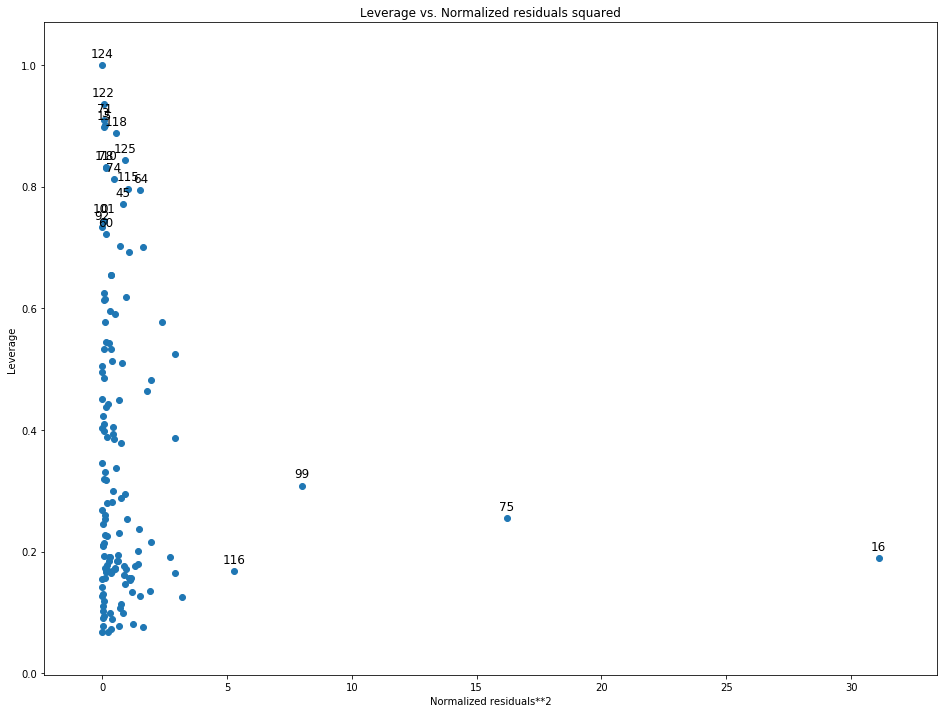

/Users/alanteran/anaconda3/lib/python3.6/site-packages/numpy/linalg/linalg.py:1804: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)


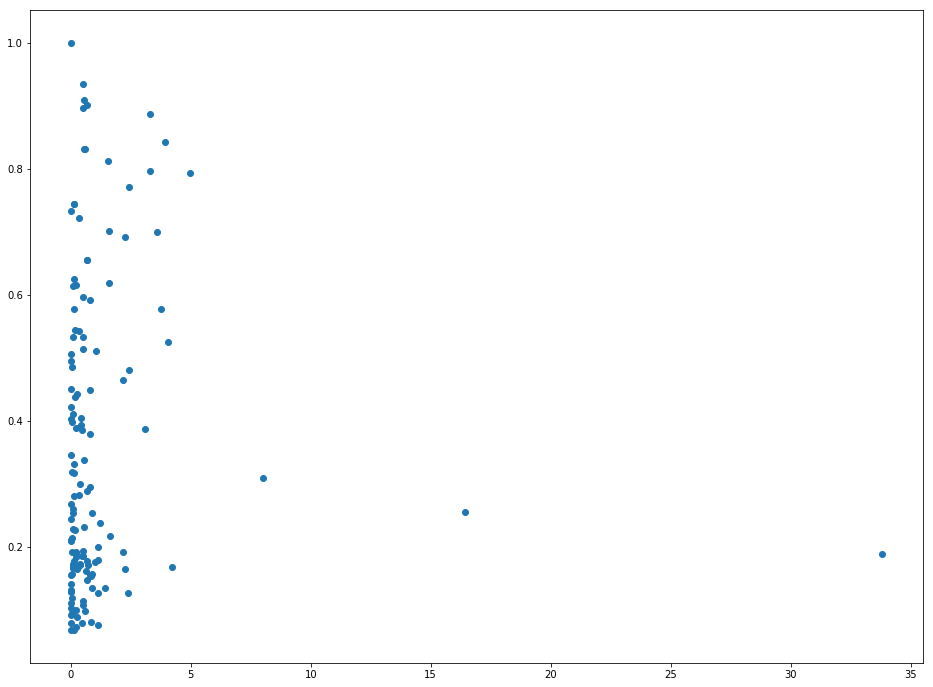

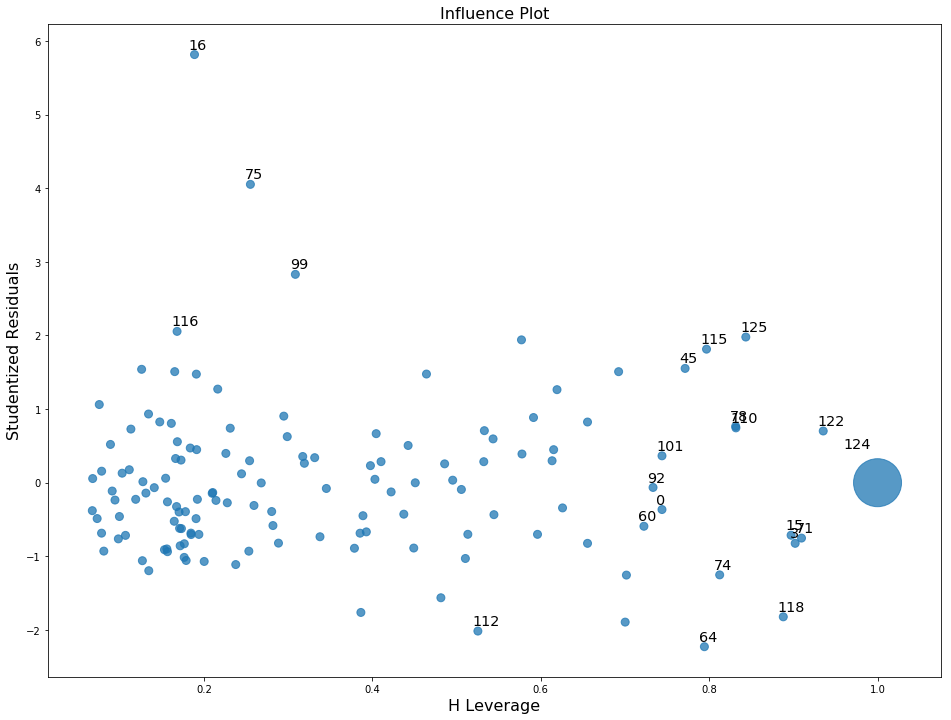

In [95]:
from statsmodels.graphics.regressionplots import * 
plot_leverage_resid2(lm)
plt.show()

plt.scatter(restaurants1res.resid_student ** 2, restaurants1res.leverage)

influence_plot(lm)
plt.show()

### Cook's D and DFITS

Both of these measurs combine information on the residual and leverage in order to quantify overall measures of influence. They give similar answers, but scale differently. 

The **cut-off point** for **Cook's D** is 4/n, so in my case: 4/137 = **0.0292**

The **cut-off point** for **DFITS** is 2*sqrt(k/n), so in my case: 2*sqrt(51/137) = **0.2772**

In [97]:
restaurants1res[abs(restaurants1res.dffits) > 2 * math.sqrt(51/137)]

,p1,p2,p3,p4,p5,p6,p7,p8,p10,p11,...,cat_7_5,cat_2,cat_3,cat_4,cat_5,cat_6,cooks,dffits,leverage,resid_student
3,6,4.5,6.0,6.0,4,4,10,8,10,8,...,1,0,0,0,0,1,0.123195,-2.502005,0.902178,-0.823876
5,6,6.0,4.5,7.5,8,10,10,8,8,10,...,0,0,0,0,0,0,0.072211,-1.925324,0.701741,-1.255198
9,6,4.5,6.0,7.5,6,4,10,10,10,2,...,1,0,0,0,0,0,0.098959,2.262732,0.692474,1.507899
10,9,6.0,6.0,6.0,4,4,10,8,10,8,...,1,0,0,0,0,0,0.159601,-2.894630,0.700271,-1.893758
15,12,7.5,6.0,6.0,2,10,10,10,10,4,...,1,1,0,0,0,0,0.087751,-2.109581,0.897311,-0.713654
16,3,5.0,4.0,4.0,2,5,5,4,4,3,...,0,0,0,0,0,0,0.112354,2.804724,0.188747,5.814713
18,4,5.0,4.0,3.0,1,2,5,5,5,2,...,0,0,0,1,0,0,0.036506,1.373568,0.464253,1.475547
26,3,5.0,4.0,5.0,2,3,5,3,4,5,...,0,0,1,0,0,0,0.043748,-1.505909,0.481386,-1.563054
45,6,6.0,6.0,4.5,2,8,10,10,8,4,...,0,0,0,0,0,0,0.156913,2.851432,0.771452,1.552021
64,12,7.5,6.0,6.0,2,8,10,10,10,4,...,1,0,0,1,0,0,0.359703,-4.378469,0.794357,-2.227778


##### Now look at DFBETA, to see how much each coefficient is changed by deleting the observation

In [111]:
restaurantsdfbeta = pd.DataFrame(influence.dfbetas, columns = restaurants.columns)
restaurantsdfbeta.head()

,p1,p2,p3,p4,p5,p6,p7,p8,p10,p11,...,cat_10,cat_4_0,cat_5_0,cat_6_0,cat_7_5,cat_2,cat_3,cat_4,cat_5,cat_6
0,-0.047745,-0.026331,0.018800,0.045444,0.010280,0.023035,0.048425,-0.024414,0.057306,-0.047925,...,0.039445,-0.001900,0.023831,0.043926,-0.020739,0.056184,-0.021163,-0.011844,0.065700,-0.021215
1,0.014699,-0.008113,0.022394,-0.020760,0.003808,0.001904,-0.051729,0.000432,-0.027027,0.017288,...,-0.024052,0.021833,-0.012438,-0.014788,0.038018,-0.038675,-0.011463,-0.009619,-0.008646,-0.020418
2,0.089303,0.046424,-0.043591,0.208839,-0.094118,0.117520,-0.088620,0.032205,-0.020539,-0.000566,...,-0.084641,-0.023105,0.009897,-0.006358,-0.008086,-0.094843,0.003301,0.029915,0.013185,0.005302
3,-0.012823,-0.050128,-0.123212,-0.043310,0.084389,0.003606,0.082854,0.020652,-0.161720,0.170550,...,0.039793,0.052909,0.030132,-0.062720,0.149742,-0.062085,0.381110,0.418433,0.362157,-0.091867
4,-0.001468,-0.008494,0.005387,0.022588,-0.002409,0.004469,-0.006931,0.000742,0.002069,-0.007874,...,0.000608,-0.001056,0.009270,0.009393,0.000668,-0.001242,-0.009818,-0.001650,-0.009738,0.005055


In [113]:
high_df_betas = []
for col in restaurantsdfbeta.columns:
    high_df_betas.append(restaurantsdfbeta[restaurantsdfbeta[col].values > .171])
high_df_betas

[           p1        p2        p3        p4        p5        p6        p7  \
 5    0.288269  0.025767 -0.062601  0.126170  0.243671 -0.613129 -0.135485   
 16   0.181777  0.458031  0.419882  0.188145 -0.388747  0.524992  0.679955   
 75   0.180922  0.658344 -0.767560 -0.189324  0.504550 -0.628875  0.664027   
 108  0.618399  0.006707 -0.109540 -0.013618  0.013797  0.031201  0.100897   
 117  0.236653  0.068658 -0.100357  0.239247 -0.142358 -0.043264 -0.208734   
 
            p8       p10       p11    ...       cat_10   cat_4_0   cat_5_0  \
 5   -0.216297 -0.122016  0.042364    ...    -0.378484 -0.046068  0.214673   
 16  -0.394480 -0.585933  0.368722    ...    -0.158487  0.070034 -0.006590   
 75   0.085585 -0.693150  0.683759    ...    -0.369010  0.465906  0.185189   
 108 -0.107930  0.016670 -0.286014    ...    -0.255288 -0.517779 -0.871871   
 117  0.099537 -0.118426 -0.400502    ...     0.090400 -0.453138 -0.043950   
 
       cat_6_0   cat_7_5     cat_2     cat_3     cat_4     c

In [114]:
### That was too ridiculously difficult... I'll just try it after eliminating the influental points. 

In [117]:
#influential points: 
resid_rows_to_discard = {16, 64, 75, 99, 112, 116} # Count = 6
leverage_rows_to_discard = {124, 122, 71, 3, 15, 118, 125, 110, 78, 74, 115, 64, 45} # Count = 13 


In [118]:
resid_rows_to_discard.intersection(leverage_rows_to_discard) # 18 total points to discard

{64}

In [141]:
drop_influencers = restaurants.drop(restaurants.index[[16, 64, 75, 99, 112, 116, 124, 122, 71, 3, 15, 118, 125, 110, 78, 74, 115, 45]])
# drop_influencers.info()


## PART 2: Tests for Normality of Residuals

In [142]:
restaurants2 = restaurants

In [146]:
lm2 = lm
restaurants2res = pd.concat([restaurants2, pd.Series(lm2.resid, name = 'resid'), pd.Series(lm2.predict(), name = "predict")], axis = 1)

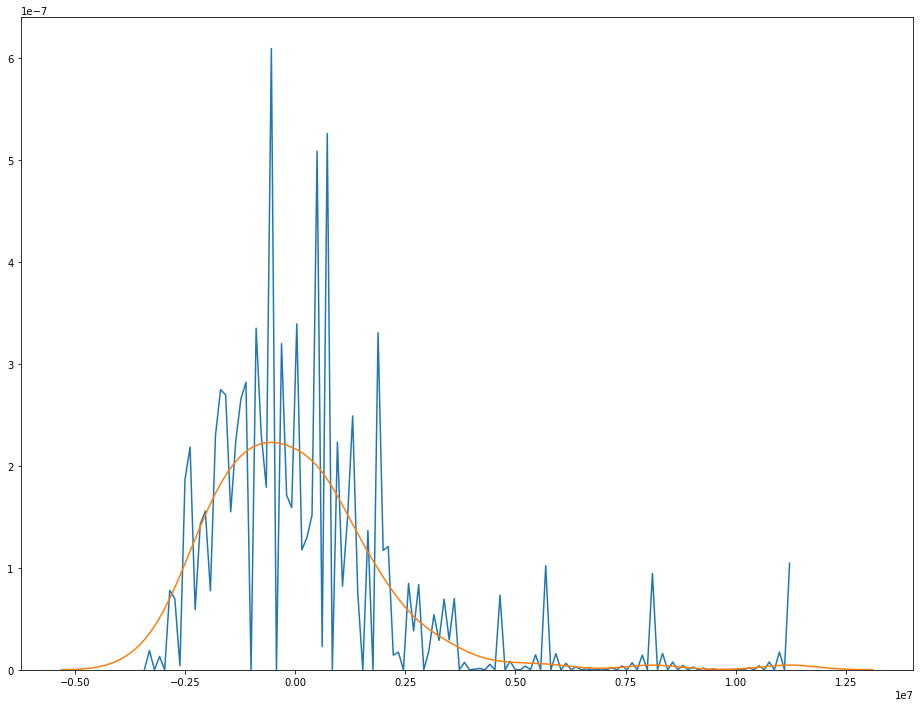

In [147]:
sns.kdeplot(np.array(restaurants2res.resid), bw=10)
sns.distplot(np.array(restaurants2res.resid), hist=False)

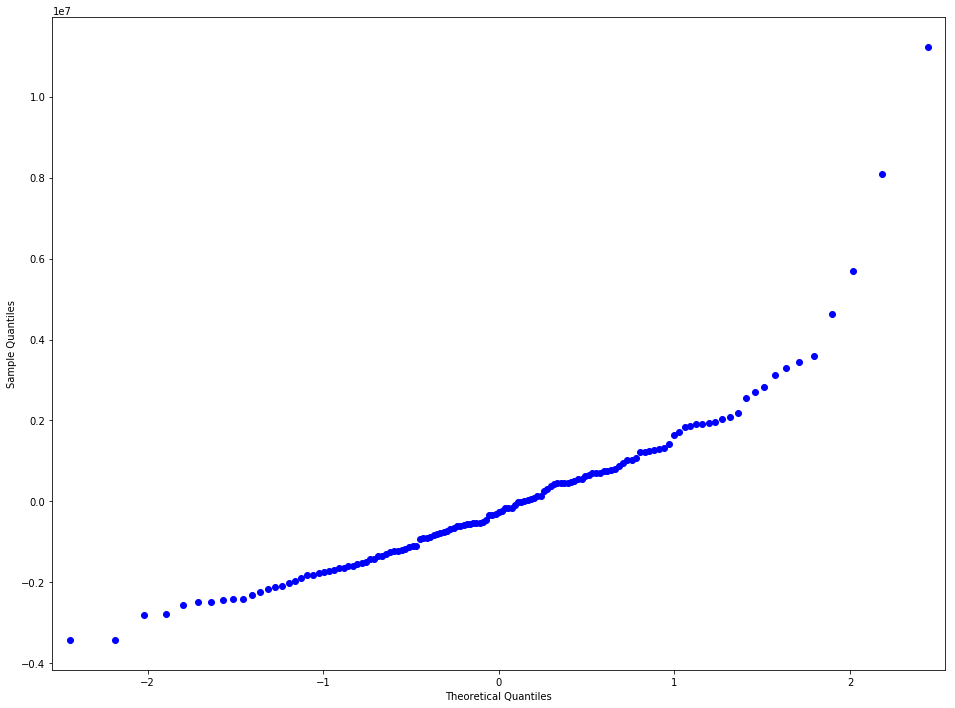

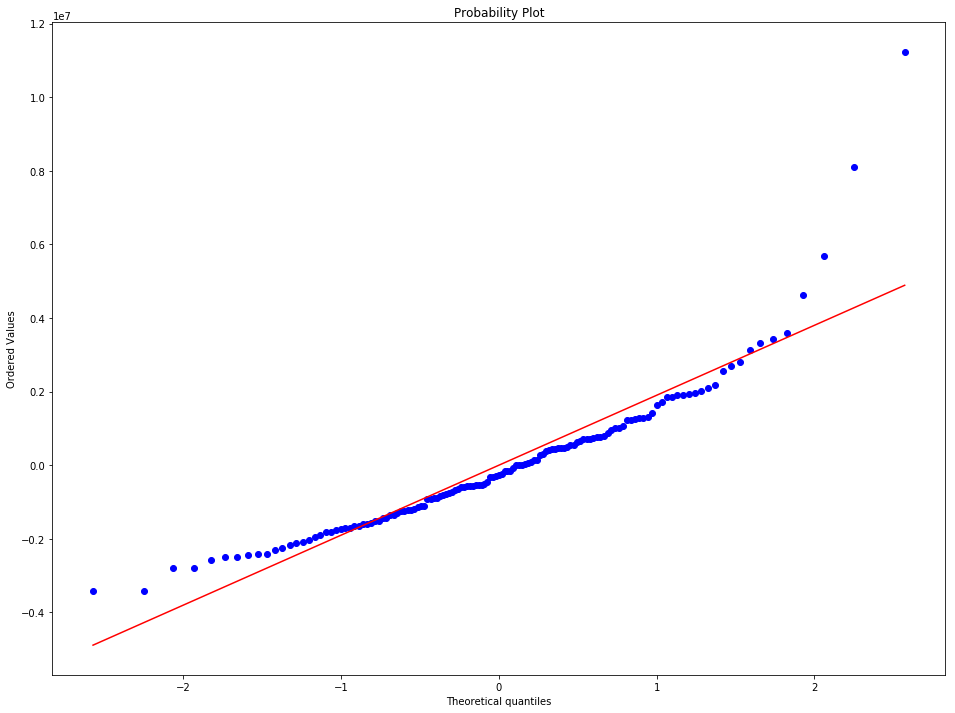

In [328]:
sm.qqplot(restaurants2res.resid)
plt.show()

import pylab
scipystats.probplot(restaurants2res.resid, dist="norm", plot=pylab)
pylab.show()

In [149]:
resid = restaurants2res.resid
norm_resid = (restaurants2res.resid - np.mean(restaurants2res.resid)) / np.std(restaurants2res.resid)
print(scipystats.kstest(norm_resid, 'norm'))

KstestResult(statistic=0.098884864487674529, pvalue=0.12826761407530007)


In [150]:
print(stats.diagnostic.kstest_normal(restaurants2res.resid, pvalmethod='approx'))
print(stats.diagnostic.normal_ad(restaurants2res.resid))

(0.099415973118924139, 0.0020646481249172329)
(2.4377588002527659, 3.4074429623925129e-06)


In [151]:
# RESEARCH HERE WTF ALL THIS MEANS....

## Tests for Heteroscedasticity

In [155]:
restaurants.columns

Index(['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p10', 'p11', 'p12',
       'p14', 'p15', 'p16', 'p17', 'p18', 'p19', 'p20', 'p21', 'p22', 'p23',
       'p24', 'p25', 'p26', 'p27', 'p28', 'p29', 'p30', 'p31', 'p32', 'p34',
       'p35', 'p36', 'p37', 'revenue', 'date_delta', 'cat_fc', 'cat_il',
       'cat_other', 'cat_5', 'cat_8', 'cat_10', 'cat_4_0', 'cat_5_0',
       'cat_6_0', 'cat_7_5', 'cat_2', 'cat_3', 'cat_4', 'cat_5', 'cat_6'],
      dtype='object')

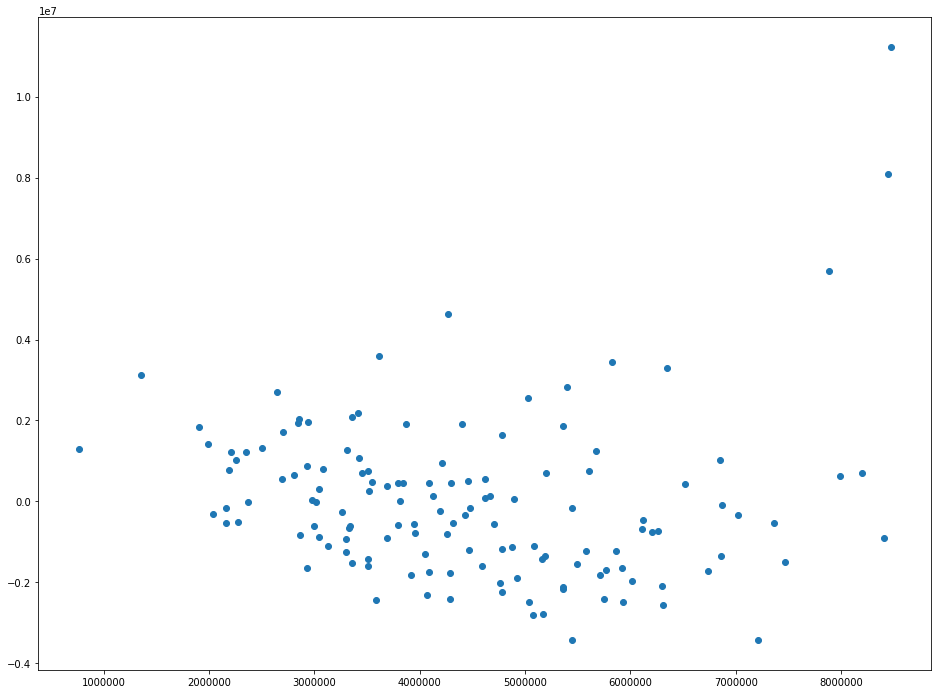

In [163]:
lm3 = lm # this is not it: smf.ols(formula = "revenue ~ p1", data = restaurants).fit()
# lm4 = smf.ols(formula = "revenue ~ p24 + p1 + p34 ", data = restaurants).fit()
resid3 = lm3.resid
plt.scatter(lm3.predict(), resid3)
# Below is a plot of the distribution of residuals... 

### Seeing dist of residuals for the data where the influencers are dropped...

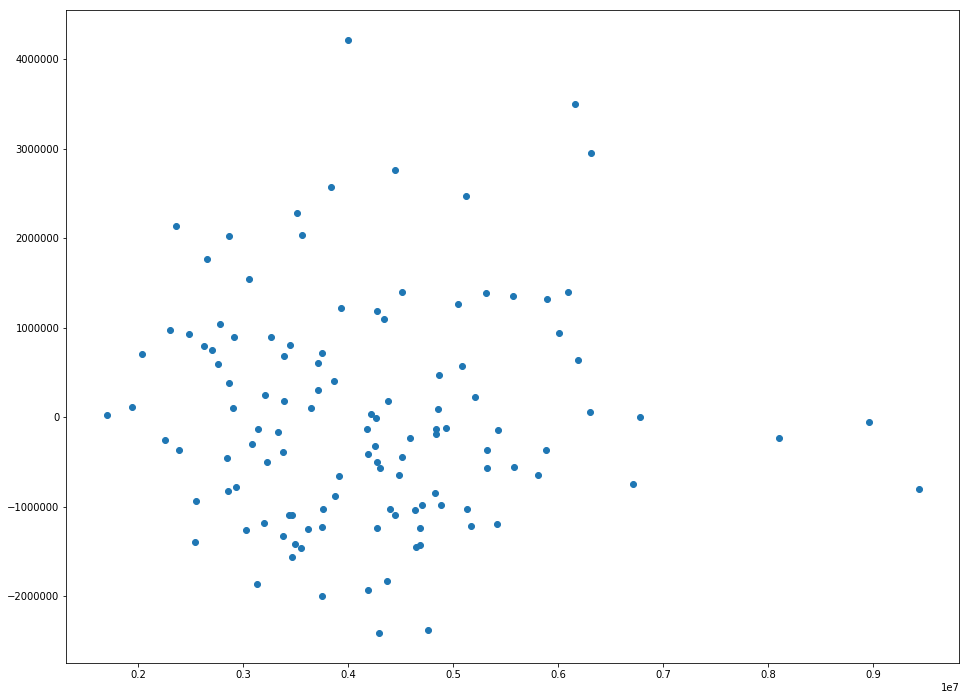

In [167]:
lm5 = smf.ols(formula = "revenue ~ p1 + p2 + p3 + p4+ p5 + p6 + p7 + p8 + p10 + p11 + p12 + p14 + p15 + p16 + p17 + p18 + p19 + p20 + p21 + p22 + p23 + p24 + p25 + p26 + p27 + p28 + p29 + p30 + p31 + p32 + p34 + p35 + p36 + p37 + date_delta + cat_fc + cat_il + cat_other + cat_5 + cat_8 + cat_10 + cat_4_0 + cat_5_0 + cat_6_0 + cat_7_5 + cat_2 + cat_3 + cat_4 + cat_5 + cat_6", data = drop_influencers).fit()
resid5 = lm5.resid
plt.scatter(lm5.predict(), resid5)
## Looks a bit better...

In [168]:
stats.diagnostic.het_white(resid3, lm3.model.exog, retres = False)
## Not sure what this means...

/Users/alanteran/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1400: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ssr/self.df_resid


(137.0, 0.45981568716787125, 0.0, nan)

## Test for Collinearity

In [172]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

lm6 = lm
y, X = dmatrices("revenue ~ p1 + p2 + p3 + p4+ p5 + p6 + p7 + p8 + p10 + p11 + p12 + p14 + p15 + p16 + p17 + p18 + p19 + p20 + p21 + p22 + p23 + p24 + p25 + p26 + p27 + p28 + p29 + p30 + p31 + p32 + p34 + p35 + p36 + p37 + date_delta + cat_fc + cat_il + cat_other + cat_5 + cat_8 + cat_10 + cat_4_0 + cat_5_0 + cat_6_0 + cat_7_5 + cat_2 + cat_3 + cat_4 + cat_5 + cat_6", data = restaurants, return_type='dataframe')
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)
len(vif)

[0.0, 25.95328214469512, 8.1232237893169614, 6.616653108844333, 7.2209885974689714, 6.1526577974402361, 8.4538244987419784, 9.8903352040250692, 31.541076833572095, inf, 9.4805241202774422, 41.375207002390823, 35.24222058495225, 37.598013142515676, 95.59541715084228, 21.858137837231297, 49.148608925386363, 17.688781792328385, 12.253304609537825, 6.4334273360916496, 2.5910557013233162, 12.449135375690863, 57.922678882332669, 33.373072370829505, 65.82232338599853, 5.6823217065259604, 13.50355582436759, 8.3809969782497351, 22.746512340187664, 22.785575590960409, 76.222838124708289, 133.38749980698341, 41.852580861973514, 272.10947262766729, 13.593943200993186, 1.7150211449133441, 81.934147091307295, 80.983290567851228, 2.3956530597678518, 8.0687191718124485, 2.6966464799471224, inf, inf, 19.879722760202473, inf, inf, inf, 8.9956206275253372, 5.524919938707626, 10.715736607953373, 11.795159565930989]


/Users/alanteran/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1386: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/alanteran/anaconda3/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


51

In [174]:
corr = np.corrcoef(X.drop("Intercept", axis = 1), rowvar=0)
print("correlation from np.corrcoef is: {}".format(corr))

correlation from np.corrcoef is: [[ 1.          0.836671    0.69592796 ..., -0.11731419  0.35460733
   0.29815621]
 [ 0.836671    1.          0.473551   ..., -0.10101576  0.25822075
   0.13974316]
 [ 0.69592796  0.473551    1.         ..., -0.0705446   0.24324143
   0.28367676]
 ..., 
 [-0.11731419 -0.10101576 -0.0705446  ...,  1.         -0.096      -0.05373284]
 [ 0.35460733  0.25822075  0.24324143 ..., -0.096       1.         -0.05373284]
 [ 0.29815621  0.13974316  0.28367676 ..., -0.05373284 -0.05373284  1.        ]]


In [175]:
print(X.drop("Intercept", axis=1).corr())

                  p1        p2        p3        p4        p5        p6  \
p1          1.000000  0.836671  0.695928  0.677941  0.302820  0.747296   
p2          0.836671  1.000000  0.473551  0.540322  0.203003  0.673106   
p3          0.695928  0.473551  1.000000  0.443606  0.168891  0.570486   
p4          0.677941  0.540322  0.443606  1.000000  0.715406  0.595724   
p5          0.302820  0.203003  0.168891  0.715406  1.000000  0.326524   
p6          0.747296  0.673106  0.570486  0.595724  0.326524  1.000000   
p7          0.853753  0.769842  0.651489  0.700482  0.446154  0.738388   
p8          0.760820  0.505116  0.689173  0.654594  0.447577  0.720144   
p10         0.795885  0.498135  0.764191  0.685416  0.462299  0.654594   
p11         0.542735  0.442719  0.417752  0.585285  0.435002  0.432959   
p12         0.708360  0.428065  0.684071  0.595115  0.409181  0.637594   
p14         0.491638  0.365777  0.393765  0.347917  0.079245  0.422343   
p15         0.473155  0.358841  0.3791

In [176]:
w, v = np.linalg.eig(corr)
print(w)

[  2.15102280e+01   7.36208307e+00   3.19089418e+00   2.04423368e+00
   1.88764101e+00   1.72862718e+00   1.33266223e+00   1.22870761e+00
   1.09077038e+00   1.10282965e+00   8.35900479e-01   6.97028650e-01
   6.50475213e-01   6.06808161e-01   5.35964099e-01   4.80055704e-01
   4.25146833e-01   4.02903149e-01   3.43017093e-01   3.04123817e-01
   2.71654847e-01   2.57380755e-01   2.06698299e-01   1.94832845e-01
   1.63155794e-01   1.43979240e-01   1.38203493e-01   1.19263758e-01
   9.62052384e-02   8.53471288e-02   8.19210743e-02   7.43601533e-02
   6.81933686e-02   5.86508289e-02   5.04679442e-02   3.90503776e-02
   3.14624387e-02   2.21091231e-03   6.01460671e-03   5.23546083e-03
   2.71480150e-02   2.36664064e-02   2.26313409e-02   1.99987419e-02
   1.65373620e-02   1.15036842e-02   1.20960956e-02   1.20295774e-02
  -3.57169909e-16  -2.93019479e-15]


In [178]:
drop_vif_columns = drop_influencers.drop(['p21', 'p23', 'p33', 'p6', 'p31', 'p15', 'p32', 'p18', 'p2', 'p16', 'p4', 'p9', 'p5', 'p20', 'p14', 'p19', 'p25', 'p24', 'p7', 'p1', 'p3', 'p34', 'p36', 'p12', 'p13', 'p10'], axis=1)
# 15 columns dropped... 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 37 columns):
p2            137 non-null float64
p4            137 non-null float64
p6            137 non-null int64
p8            137 non-null int64
p11           137 non-null int64
p15           137 non-null int64
p16           137 non-null int64
p17           137 non-null int64
p18           137 non-null int64
p22           137 non-null int64
p23           137 non-null int64
p26           137 non-null float64
p27           137 non-null float64
p28           137 non-null float64
p29           137 non-null float64
p30           137 non-null int64
p31           137 non-null int64
p32           137 non-null int64
p35           137 non-null int64
p37           137 non-null int64
revenue       137 non-null float64
date_delta    137 non-null float64
cat_fc        137 non-null uint8
cat_il        137 non-null uint8
cat_other     137 non-null uint8
cat_5         137 non-null uint8
cat_8         137 non

### Now let's test to see if in dropping the high VIF columns, we also dropped some of the influential points. 

In [191]:
lm_dropped = smf.ols(formula = "revenue ~ p2 + p4+ + p6 + p8 + p11 + p15 + p16 + p17 + p18 + p22 + p23 + p26 + p27 + p28 + p29 + p30 + p31 + p32 + p35 + p37 + date_delta + cat_fc + cat_il + cat_other + cat_5 + cat_8 + cat_10 + cat_4_0 + cat_5_0 + cat_6_0 + cat_7_5 + cat_2 + cat_3 + cat_4 + cat_5 + cat_6", data = drop_vif_columns).fit()
print(lm_dropped.summary())


                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     1.428
Date:                Thu, 28 Jun 2018   Prob (F-statistic):             0.0870
Time:                        13:18:16   Log-Likelihood:                -2188.7
No. Observations:                 137   AIC:                             4449.
Df Residuals:                     101   BIC:                             4555.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.632e+06   5.25e+06      1.833      0.0

/Users/alanteran/anaconda3/lib/python3.6/site-packages/numpy/linalg/linalg.py:1804: RuntimeWarning: overflow encountered in det
  r = _umath_linalg.det(a, signature=signature)




Leverage v.s. Studentized Residuals


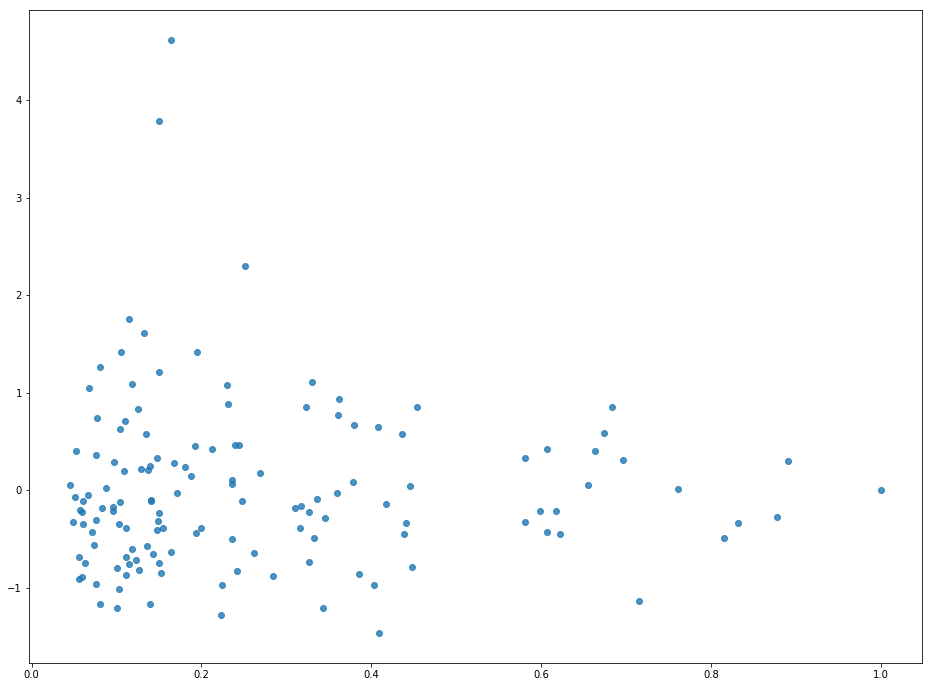

In [192]:
influence1 = lm_dropped.get_influence()
resid_student1 = influence1.resid_studentized_external
(cooks1, p1) = influence1.cooks_distance
(dffits1, p1) = influence1.dffits
leverage1 = influence1.hat_matrix_diag
print('\n')
print('Leverage v.s. Studentized Residuals')
sns.regplot(leverage1, lm_dropped.resid_pearson, fit_reg=False)

In [196]:
drop_vif_columns1res = pd.concat([pd.Series(cooks1, name = "cooks"), pd.Series(dffits1, name = "dffits"), pd.Series(leverage1, name = "leverage"), pd.Series(resid_student1, name = "resid_student")], axis = 1)
drop_vif_columns1res = pd.concat([drop_vif_columns, drop_vif_columns1res], axis = 1)
drop_vif_columns1res.head()

,p2,p4,p6,p8,p11,p15,p16,p17,p18,p22,...,cat_7_5,cat_2,cat_3,cat_4,cat_5,cat_6,cooks,dffits,leverage,resid_student
0,5.0,4.0,2,4,3,2,2,2,4,3,...,0,0,0,0,1,0,0.019169,-0.839916,0.606526,-0.676502
1,5.0,4.0,2,5,1,0,0,0,0,3,...,0,0,0,0,0,0,0.001325,0.220997,0.076593,0.767344
2,4.0,5.0,3,5,2,0,0,0,0,1,...,0,0,0,0,0,0,0.000308,-0.106250,0.150226,-0.252701
3,4.5,6.0,4,8,8,4,9,3,12,1,...,1,0,0,0,0,1,0.118145,-2.086723,0.877402,-0.780022
4,4.0,4.0,2,5,2,1,2,1,4,2,...,0,1,0,0,0,0,0.001674,0.247983,0.192912,0.507228


In [186]:
r1 = drop_vif_columns1res.resid_student
print('-'*30 + ' studentized residual ' + '-'*30)
print(r1.describe())
print('\n')

r1_sort = drop_vif_columns1res.sort_values(by= 'resid_student')
print('-'*30 + ' top 5 most negative residuals ' + '-'*30)
print(r1_sort.head())
print('\n')

print('-'*30 + ' top 5 most positive residuals ' + '-'*30)
print(r1_sort.tail())

------------------------------ studentized residual ------------------------------
count    137.000000
mean       0.002591
std        1.040005
min       -2.172084
25%       -0.692140
50%       -0.184370
75%        0.507228
max        5.808285
Name: resid_student, dtype: float64


------------------------------ top 5 most negative residuals ------------------------------
      p2   p4  p6  p8  p11  p15  p16  p17  p18  p22      ...        cat_7_5  \
64   7.5  6.0   8  10    4   10   15   15   12    3      ...              1   
112  5.0  4.0   5   5    2    4    2    1    4    2      ...              0   
26   5.0  5.0   3   3    5    4    4    1    4    3      ...              0   
117  5.0  5.0   3   4    4    3    3    1    4    2      ...              0   
131  4.0  5.0   4   4    5    0    0    0    0    2      ...              0   

     cat_2  cat_3  cat_4  cat_5  cat_6     cooks    dffits  leverage  \
64       0      0      1      0      0  0.308626 -3.440859  0.715056   
112     

In [187]:
print(drop_vif_columns[abs(r1) > 2])

     p2   p4  p6  p8  p11  p15  p16  p17  p18  p22  ...    cat_10  cat_4_0  \
16  5.0  4.0   5   4    3    0    0    0    0    1  ...         0        1   
64  7.5  6.0   8  10    4   10   15   15   12    3  ...         1        0   
75  5.0  5.0   4   3    5    0    0    0    0    5  ...         0        1   
99  5.0  4.0   4   4    5    5    5    5    5    3  ...         0        1   

    cat_5_0  cat_6_0  cat_7_5  cat_2  cat_3  cat_4  cat_5  cat_6  
16        0        0        0      0      0      0      0      0  
64        0        0        1      0      0      1      0      0  
75        0        0        0      0      0      0      0      0  
99        0        0        0      1      0      0      0      0  

[4 rows x 37 columns]


In [190]:
leverage1 = drop_vif_columns1res.leverage
print('-'*30 + ' Leverage ' + '-'*30)
print(leverage1.describe())
print('\n')

leverage_sort1 = drop_vif_columns1res.sort_values(by= 'leverage', ascending=False)
print('-'*30 + ' top 15 highest leverage data points ' + '-'*30)
print(leverage_sort1.head(20))

------------------------------ Leverage ------------------------------
count    137.000000
mean       0.262774
std        0.214483
min        0.044846
25%        0.109291
50%        0.170898
75%        0.359307
max        1.000000
Name: leverage, dtype: float64


------------------------------ top 15 highest leverage data points ------------------------------
      p2   p4  p6  p8  p11  p15  p16  p17  p18  p22      ...        cat_7_5  \
124  3.0  5.0   5   5    2    0    0    0    0    1      ...              0   
122  7.5  7.5   8   8   10    8   12    6    9    5      ...              0   
3    4.5  6.0   4   8    8    4    9    3   12    1      ...              1   
71   7.5  6.0  10  10    4    8   12    3   12    3      ...              1   
118  7.5  4.5  10  10    4    4    9    3    3    4      ...              1   
15   7.5  6.0  10  10    4   10   15    3   12    2      ...              1   
64   7.5  6.0   8  10    4   10   15   15   12    3      ...              1   
110  3

In [204]:
# resids_to_drop_vif_adjusted = {75, 16, 64, 99}
# levs_to_drop_vif_adjusted = {108, 54, 60, 0, 101, 74, 92, 78, 45, 115, 125, 110, 64, 15, 118, 71, 3, 122, 124}
# total_drops = resids_to_drop_vif_adjusted.union(levs_to_drop_vif_adjusted)
# total_drops
# drop_influencers = restaurants.drop(restaurants.index[[16, 64, 75, 99, 112, 116, 124, 122, 71, 3, 15, 118, 125, 110, 78, 74, 115, 45]])
dropped_influencers_and_vifs = drop_vif_columns.drop(drop_vif_columns.index[[0, 3,15,16,45,54,60,64,71,74,75,78,92,99,101,108,110,115,118,122,124,125]])

In [205]:
dropped_influencers_and_vifs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 1 to 136
Data columns (total 37 columns):
p2            115 non-null float64
p4            115 non-null float64
p6            115 non-null int64
p8            115 non-null int64
p11           115 non-null int64
p15           115 non-null int64
p16           115 non-null int64
p17           115 non-null int64
p18           115 non-null int64
p22           115 non-null int64
p23           115 non-null int64
p26           115 non-null float64
p27           115 non-null float64
p28           115 non-null float64
p29           115 non-null float64
p30           115 non-null int64
p31           115 non-null int64
p32           115 non-null int64
p35           115 non-null int64
p37           115 non-null int64
revenue       115 non-null float64
date_delta    115 non-null float64
cat_fc        115 non-null uint8
cat_il        115 non-null uint8
cat_other     115 non-null uint8
cat_5         115 non-null uint8
cat_8         115 non

In [206]:
dropped_influencers_and_vifs.to_pickle('dropped_influencers_and_vifs.pkl')

In [307]:
sklm = LinearRegression()
sklm.fit(X_train_std, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [308]:
### RECURSIVE FEATURE SELECTION
from sklearn.feature_selection import RFE
selector = RFE(sklm_fitted, n_features_to_select=15) # instantiated linear model
selector.fit(X_train_std, y_train)
# capture feature ranking
column_ranking = []
cols_X = X.columns.tolist()
ranking = selector.ranking_.tolist()
for rank, col in zip(ranking, cols_X):
    column_ranking.append((rank, col))
column_ranking.sort()
# selector.n_features_
# Text
# y_pred_train_rfe = selector.predict(X_train_std)
# y_pred_test_rfe = selector.predict(X_test_std)
# test_rmse_rfe = calc_rmse(y_test, y_pred_test_rfe)

In [309]:
column_ranking

[(1, 'cat_4'),
 (1, 'cat_fc'),
 (1, 'cat_il'),
 (1, 'date_delta'),
 (1, 'p15'),
 (1, 'p20'),
 (1, 'p25'),
 (1, 'p26'),
 (1, 'p28'),
 (1, 'p30'),
 (1, 'p31'),
 (1, 'p32'),
 (1, 'p36'),
 (1, 'p6'),
 (1, 'p8'),
 (2, 'cat_10'),
 (3, 'cat_6'),
 (4, 'p1'),
 (5, 'cat_7_5'),
 (6, 'p17'),
 (7, 'p34'),
 (8, 'p21'),
 (9, 'p35'),
 (10, 'p18'),
 (11, 'cat_5'),
 (12, 'p22'),
 (13, 'p3'),
 (14, 'p2'),
 (15, 'p16'),
 (16, 'p24'),
 (17, 'p12'),
 (18, 'p29'),
 (19, 'p37'),
 (20, 'p27'),
 (21, 'p4'),
 (22, 'cat_5_0'),
 (23, 'cat_4_0'),
 (24, 'cat_other'),
 (25, 'p11'),
 (26, 'cat_8'),
 (27, 'p23'),
 (28, 'cat_3'),
 (29, 'cat_5'),
 (30, 'cat_2'),
 (31, 'p10'),
 (32, 'p14'),
 (33, 'p7'),
 (34, 'p19'),
 (35, 'p5'),
 (36, 'cat_6_0')]